In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train=pd.read_csv(r'C:\data set\air passenger 1\train.csv')
df_test = pd.read_csv(r'C:\data set\air passenger\test.csv')

In [3]:
df_train.shape

(103904, 25)

In [4]:
df_test.shape

(25976, 25)

In [5]:
df = pd.concat([df_train,df_test]).reset_index(drop=True)

In [6]:
df.shape

(129880, 25)

In [7]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
df['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [9]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [10]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [12]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [13]:
# Lets check for percentage of null values in each column where null are present 
(df.isnull().sum()/df.shape[0])*100

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

In [14]:
df.describe().round(2)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129487.00
mean,44158.70,64940.50,39.43,1190.32,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.31,3.64,3.29,14.71,15.09
std,31207.38,37493.27,15.12,997.45,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.07,38.47
min,0.00,1.00,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,16234.75,32470.75,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,38963.50,64940.50,40.00,844.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,71433.25,97410.25,51.00,1744.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,103903.00,129880.00,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


In [15]:
# Lets see the 5 point summary for categorical data 
df.select_dtypes(np.object).describe()

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65899,106100,89693,62160,73452


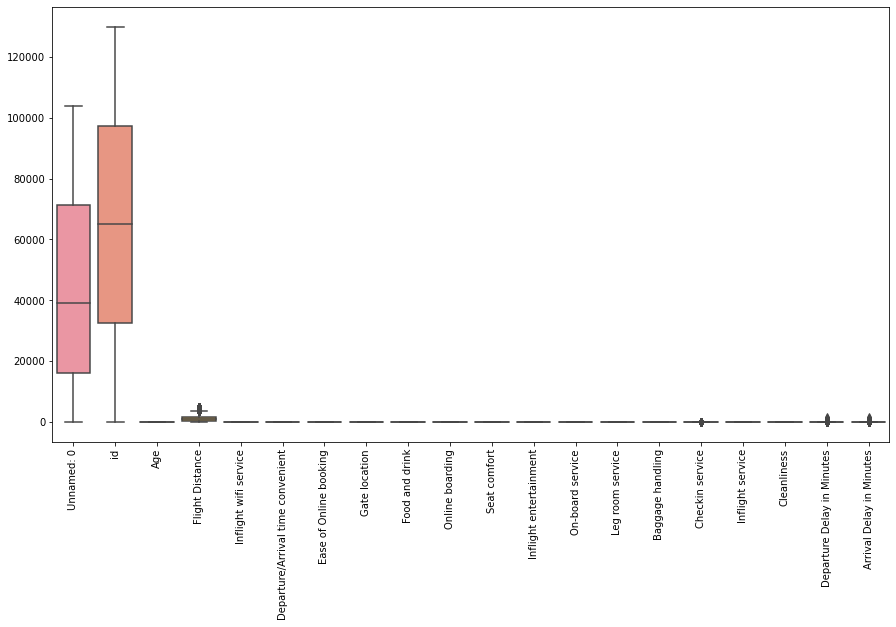

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)
plt.xticks(rotation=90) 
plt.show()

In [17]:
#As we can see from boxplot there are outliers present in several columns
#1.Flight Distance
#2.Checkin Services
#3.Departure delay in Minutes
#4.Arrival Delay in Minutes

In [18]:
df1=df

In [19]:
df1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [20]:
# Coverting some columns data types to object so that its catagorical summary can be seen
for i in df1.iloc[:,9:23].columns:
    df1[i] = df1[i].astype(object)

In [21]:
df1.select_dtypes(np.object).describe()

,Gender,Customer Type,Type of Travel,Class,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
count,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880,129880
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,5,6,6,6,466,2
top,Female,Loyal Customer,Business travel,Business,4,3,3,4,4,4,4,4,4,4,4,4,4,0,neutral or dissatisfied
freq,65899,106100,89693,62160,31880,30393,35717,30563,38468,39756,36791,38703,35886,46761,36333,47323,33969,73356,73452


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

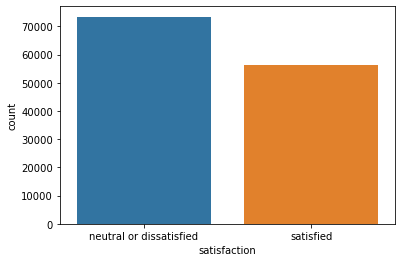

In [22]:
sns.countplot(df1['satisfaction'])

In [23]:
# Lets check for presence of class balance or imbalance in target variable
(df1['satisfaction'].value_counts()/df1.shape[0])*100

neutral or dissatisfied    56.553742
satisfied                  43.446258
Name: satisfaction, dtype: float64

([<matplotlib.patches.Wedge at 0x1d64e066970>,
 [Text(-0.22488421808296186, 1.0767669610724575, 'Neutral or dissatisfied'),
  Text(0.22488411726876187, -1.0767669821276329, 'Satisfied')],
 [Text(-0.12266411895434282, 0.5873274333122495, '56.6%'),
  Text(0.12266406396477919, -0.5873274447968906, '43.4%')])

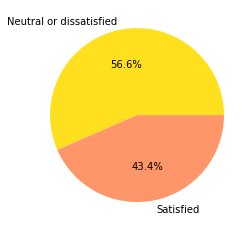

In [24]:
plt.pie(df1.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("gnuplot2_r"), autopct = '%1.1f%%')

#### Exploratory data analysis

In [25]:
df1.head(1)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied


In [26]:
# We are dropping these columns as they won't help in any further analysis
df1 = df1.drop(['id','Unnamed: 0'],axis=1)

In [27]:
#Lets check for data dimensions 
df1.shape

(129880, 23)

In [28]:
# We are converting out target classes to 0 and 1
df1["satisfaction"] = df1["satisfaction"].map({'neutral or dissatisfied':0, 'satisfied':1})

In [29]:
df1.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient     object
Ease of Online booking                object
Gate location                         object
Food and drink                        object
Online boarding                       object
Seat comfort                          object
Inflight entertainment                object
On-board service                      object
Leg room service                      object
Baggage handling                      object
Checkin service                       object
Inflight service                      object
Cleanliness                           object
Departure Delay in Minutes            object
Arrival Delay in Minutes             float64
satisfacti

In [30]:
# Lets find out Quantile 1 Quartile 2 and Inter quartile range for outlier treatment
#Q1
Q1 = df1.quantile(.25)
#Q2
Q3 = df1.quantile(.75)
#IQR
IQR=Q3-Q1

In [31]:
IQR

Age                           24.0
Flight Distance             1330.0
Inflight wifi service          2.0
Arrival Delay in Minutes      13.0
satisfaction                   1.0
dtype: float64

In [32]:
# treating with the outliers
df2 = df1[~((df1<(Q1-1.5*IQR))|(df1>(Q3+1.5*IQR))).any(axis=1)]

In [33]:
#Lets replace the string type null values with numpy null values so the null treatment can be done efficiently 
df2.replace({'NaN':np.nan},inplace=True)

In [34]:
# Null imputed
df2['Arrival Delay in Minutes']=df2['Arrival Delay in Minutes'].fillna(df2['Arrival Delay in Minutes'].median())
# We imputed it through median as even after doing outlier treatment ,we still got some outliers in the data ,
# so we decided to impute it by median as mean is sensitive to outliers

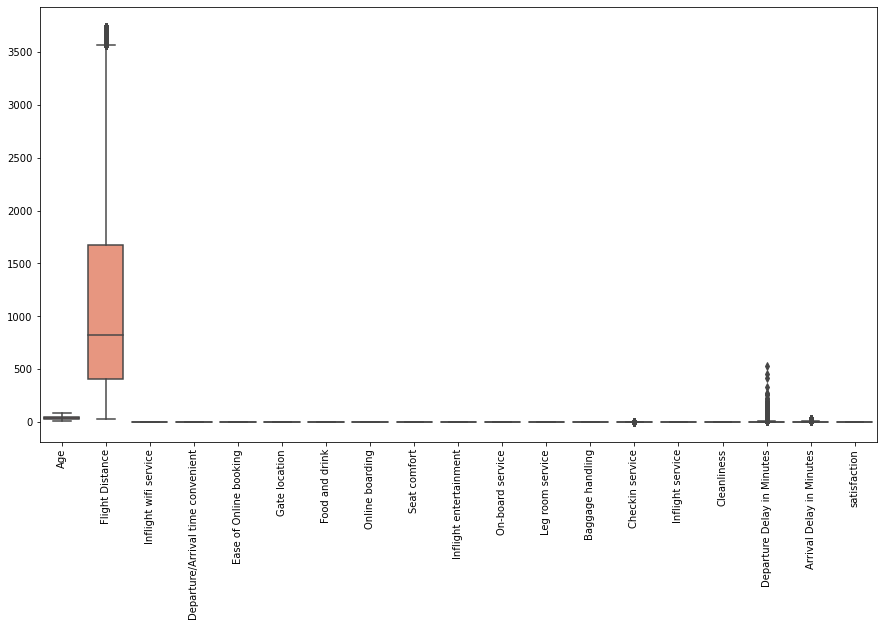

In [35]:
#Lets check if the outliers are removed
fig=plt.figure(figsize=(15,8))
sns.boxplot(data=df2)
plt.xticks(rotation=90)
plt.show()

In [36]:
df1.shape

(129880, 23)

In [37]:
# as the outliers are still present lets find out the data dimensions if the data is reduced 
df2.shape

(109927, 23)

In [38]:
df2

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0
129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1
129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0
129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1


In [39]:
# The number of rows in actual are 106749 ,however in the data the index range is till 129879 so we need to reset 
# the index
df2=df2.reset_index()

In [40]:
# Drop the existing index
df2.drop('index',axis=1,inplace=True)
df2

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109922,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0
109923,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1
109924,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0
109925,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1


In [41]:
df2['Departure/Arrival time convenient'].unique()

array([4, 2, 5, 3, 1, 0], dtype=int64)

###### Univariate Analysis

In [42]:
# Here we seperated stored the numerical columns into df_num for further analysis
df_num = df2[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']]

In [43]:
# Here we seperated stored the categorical columns into df_cat for further analysis
df_cat = df2[['Gender', 'Customer Type','Type of Travel', 'Class','Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','satisfaction']]

In [44]:
#Lets check for the dimensions of df_num
df_num.shape

(109927, 4)

In [45]:
#Lets check for the dimensions of df_num
df_cat.shape

(109927, 19)

#### Bivariate Analysis
#### 1) Numerical v/s Numerical

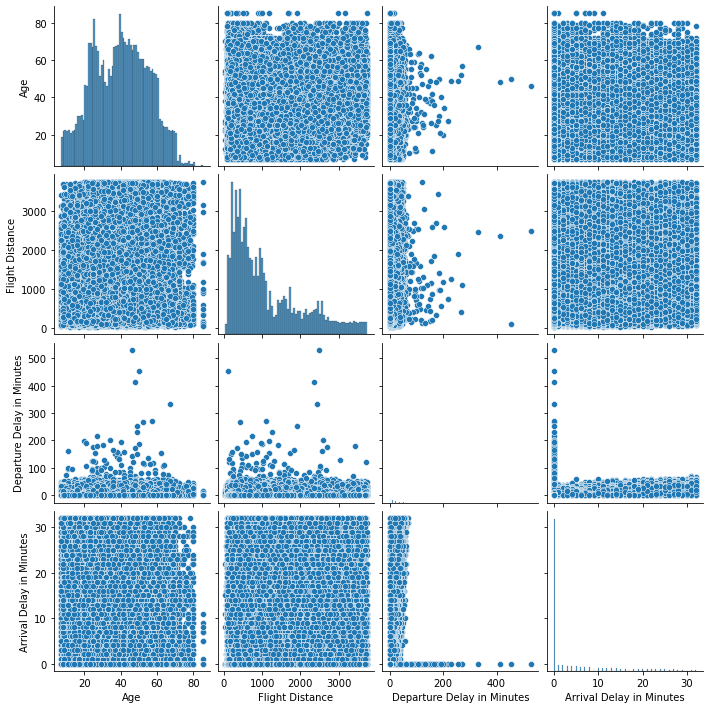

In [46]:
sns.pairplot(data=df_num)

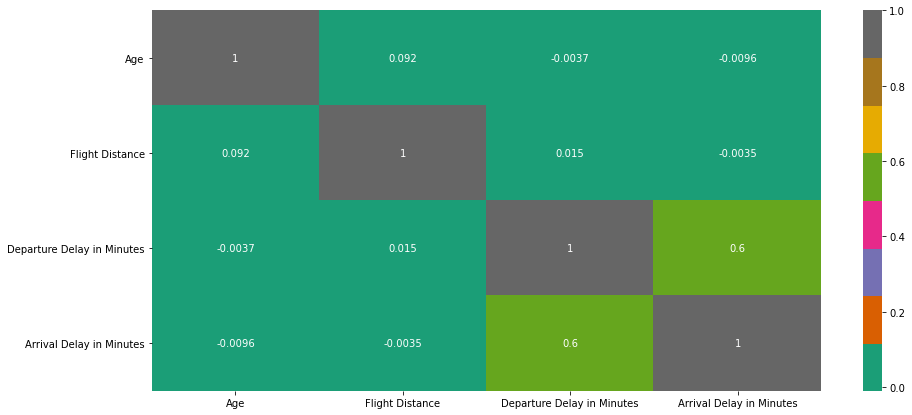

In [47]:
plt.figure(figsize=(15,7))
sns.heatmap(df_num.corr(),annot=True,cmap='Dark2')
plt.show()

#### 2) Numerical v/s Categorical

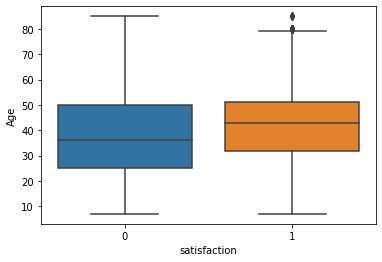

In [48]:
# Lets check if there is a pattern between age and the satisfaction of the customer
sns.boxplot(df_cat['satisfaction'],df_num['Age'])
plt.show()
# No as such pattern is found here

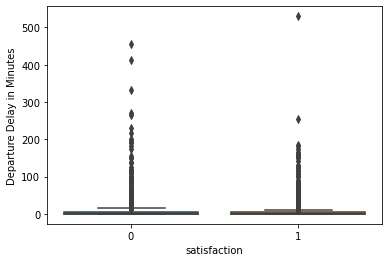

In [49]:
# Lets check if there is a pattern between departure delay in minutes and the satisfaction of the customer
sns.boxplot(df_cat['satisfaction'],df_num['Departure Delay in Minutes'])
plt.show()
# There is a minor patern that as the

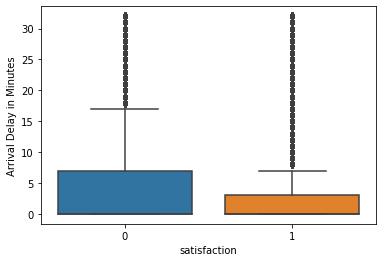

In [50]:
# Lets check if there is a pattern between arrival delay in minutes and the satisfaction of the customer
sns.boxplot(df_cat['satisfaction'],df_num['Arrival Delay in Minutes'])
plt.show()
# There is a pattern that as the arrival delay in minutes increases people tend more to be dissatisfied or neutral

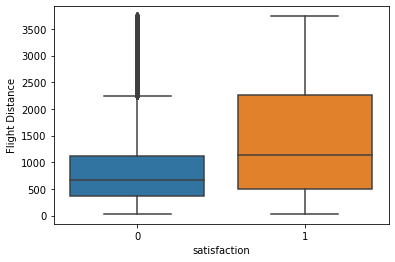

In [51]:
# Lets check if there is a pattern between flight distance and the satisfaction of the customer
sns.boxplot(df_cat['satisfaction'],df_num['Flight Distance'])
plt.show()
# People tend to be more satisfied as flight distance increases.

In [52]:
df2.groupby('satisfaction')['Age'].describe().round(2)
# No definite pattern

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
0,61686.0,37.64,16.49,7.0,25.0,36.0,50.0,85.0
1,48241.0,41.60,12.97,7.0,32.0,43.0,51.0,85.0


In [53]:
df2.groupby('satisfaction')['Departure Delay in Minutes'].describe().round(2)
# No definite pattern

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
0,61686.0,4.95,10.28,0.0,0.0,0.0,6.0,455.0
1,48241.0,4.01,9.10,0.0,0.0,0.0,4.0,530.0


In [54]:
df2.groupby('satisfaction')['Arrival Delay in Minutes'].describe().round(2)
# Our above inference from boxplot is confirmed by this as Arrival Delay in Minutes increases people tend to be
# dissatisfied or neutral

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
0,61686.0,4.66,7.95,0.0,0.0,0.0,7.0,32.0
1,48241.0,3.35,6.92,0.0,0.0,0.0,3.0,32.0


In [55]:
tb1 = pd.crosstab(df_cat['Gender'],df_cat['satisfaction'])
tb1

satisfaction,0,1
Gender,,
Female,31573,24197
Male,30113,24044


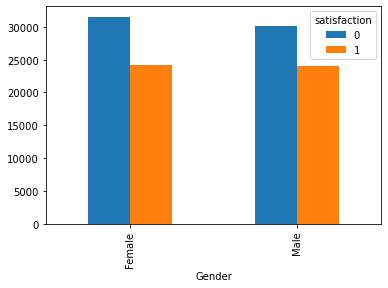

In [56]:
tb1.plot(kind='bar')
plt.show()

### Data preprocessing model

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109927 entries, 0 to 109926
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             109927 non-null  object 
 1   Customer Type                      109927 non-null  object 
 2   Age                                109927 non-null  int64  
 3   Type of Travel                     109927 non-null  object 
 4   Class                              109927 non-null  object 
 5   Flight Distance                    109927 non-null  int64  
 6   Inflight wifi service              109927 non-null  int64  
 7   Departure/Arrival time convenient  109927 non-null  int64  
 8   Ease of Online booking             109927 non-null  int64  
 9   Gate location                      109927 non-null  int64  
 10  Food and drink                     109927 non-null  int64  
 11  Online boarding                    1099

In [58]:
#lets store categorical data type 
cat=df2.select_dtypes(np.object)
cat

,Gender,Customer Type,Type of Travel,Class
0,Male,Loyal Customer,Personal Travel,Eco Plus
1,Male,disloyal Customer,Business travel,Business
2,Female,Loyal Customer,Business travel,Business
3,Female,Loyal Customer,Business travel,Business
4,Male,Loyal Customer,Business travel,Business
...,...,...,...,...
109922,Male,disloyal Customer,Business travel,Business
109923,Male,Loyal Customer,Business travel,Business
109924,Female,Loyal Customer,Personal Travel,Eco
109925,Male,Loyal Customer,Business travel,Business


In [59]:
# dummies done for the categorical data type 
x_cat=pd.get_dummies(cat,drop_first=True)

In [60]:
# numerical data type selected 
x_num = df2.select_dtypes(np.number)

In [61]:
# both dummies and numerical data type are concated into one dataframe
x1 = pd.concat([x_num,x_cat],axis=1)

In [62]:
x = x1.drop("satisfaction",axis=1)

In [63]:
y = x1['satisfaction']

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=  0.30, random_state=12
                                                 )

In [113]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(criterion='entropy')
rc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy')

In [114]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [115]:
confusion_matrix(y_test,rc.predict(x_test))

array([[18005,   418],
       [  943, 13613]], dtype=int64)

In [116]:
confusion_matrix(y_train,rc.predict(x_train))

array([[43263,     0],
       [    0, 33685]], dtype=int64)

In [117]:
accuracy_score(y_test,rc.predict(x_test))

0.9587313138663999

In [118]:
accuracy_score(y_train,rc.predict(x_train))

1.0

<AxesSubplot:>

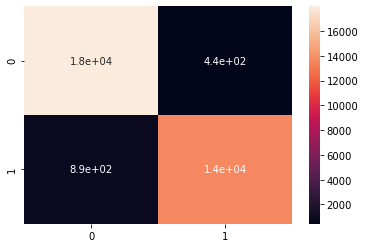

In [73]:
sns.heatmap(confusion_matrix(y_test,rc.predict(x_test)),annot=True)

In [74]:
from matplotlib.colors import ListedColormap

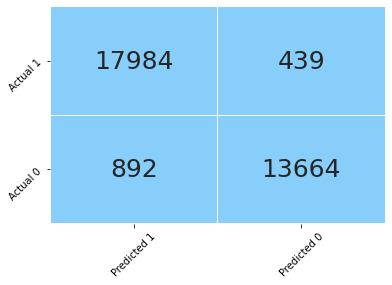

In [79]:
cm = confusion_matrix(y_test, rc.predict(x_test))

conf_matrix = pd.DataFrame(cm,columns = ['Predicted 1','Predicted 0'], index = ['Actual 1','Actual 0'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

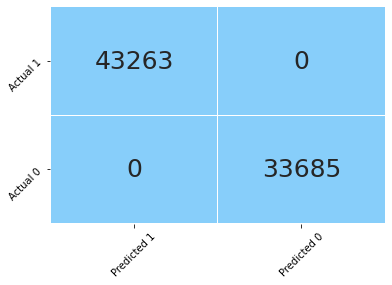

In [80]:
cm = confusion_matrix(y_train, rc.predict(x_train))

conf_matrix = pd.DataFrame(cm,columns = ['Predicted 1','Predicted 0'], index = ['Actual 1','Actual 0'])

sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,
           linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [88]:
accuracy_score(y_test,lr.predict(x_test))

0.8143970405409503

In [89]:
accuracy_score(y_train,lr.predict(x_train))

0.8161355720746478

In [90]:
import statsmodels.api as sm

In [93]:
model1 = sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.367530
         Iterations 7


In [94]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                76948
Model:                          Logit   Df Residuals:                    76925
Method:                           MLE   Df Model:                           22
Date:                Sat, 27 Aug 2022   Pseudo R-squ.:                  0.4638
Time:                        00:41:16   Log-Likelihood:                -28281.
converged:                       True   LL-Null:                       -52739.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0309      0.001    -42.048      0.000      -0.032      -0.029
Flight Distance                      -0.0003   1.29e-05    -21.166      0.000      -0.000      -0.000
Inflight wifi service                 0.4701      0.013     36.544      0.000       0.445       0.495
Departure/Arrival time convenient    -0.1356      0.009    -15.367      0.000      -0.153      -0.118
Ease of Online booking               -0.2221      0.013    -17.762      0.000      -0.247      -0.198
Gate location                        -0.1279      0.010    -13.125      0.000      -0.147      -0.109
Food and drink                       -0.2405      0.012    -20.136      0.000      -0.264      -0.217
Online boarding                       0.4586      0.011     41.132      0.000       0.437       0.480
Seat comfort                         -0.0207      0.012     -1.691      0.091      -0.045       0.003
Inflight entertainment                0.2947      0.016     18.347      0.000       0.263       0.326
On-board service                      0.2281      0.011     20.429      0.000       0.206       0.250
Leg room service                      0.1239      0.009     13.501      0.000       0.106       0.142
Baggage handling                     -0.0293      0.012     -2.377      0.017      -0.053      -0.005
Checkin service                       0.2194      0.009     23.711      0.000       0.201       0.237
Inflight service                     -0.0923      0.013     -7.097      0.000      -0.118      -0.067
Cleanliness                           0.1207      0.014      8.898      0.000       0.094       0.147
Departure Delay in Minutes           -0.0007      0.001     -0.494      0.621      -0.003       0.002
Arrival Delay in Minutes             -0.0429      0.002    -23.502      0.000      -0.047      -0.039
Gender_Male                          -0.1439      0.021     -6.760      0.000      -0.186      -0.102
Customer Type_disloyal Customer      -2.4356      0.032    -75.479      0.000      -2.499      -2.372
Type of Travel_Personal Travel       -2.5849      0.033    -77.491      0.000      -2.650      -2.520
Class_Eco                            -1.3406      0.026    -50.621      0.000      -1.393      -1.289
Class_Eco Plus                       -1.5129      0.045    -33.956      0.000      -1.600      -1.426
=====================================================================================================
"""

In [95]:
#Lets get the pvalues of the features
pvalue = pd.DataFrame(model1.pvalues)

In [97]:
#Significant Festures which are having pvalue less than 0.05
pvalue[pvalue[0]>0.05].index

Index(['Seat comfort', 'Departure Delay in Minutes'], dtype='object')

In [100]:
#new_xtrain with significant features
x_train.drop(['Flight Distance', 'Inflight entertainment',
       'Departure Delay in Minutes'],axis=1,inplace=True)

In [101]:
#new_xtest with significant features
x_test.drop(['Flight Distance', 'Inflight entertainment',
       'Departure Delay in Minutes'],axis=1,inplace=True)

In [102]:
model12 = sm.Logit(y_train,x_train).fit()

Optimization terminated successfully.
         Current function value: 0.373053
         Iterations 7


In [103]:
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:                76948
Model:                          Logit   Df Residuals:                    76928
Method:                           MLE   Df Model:                           19
Date:                Sat, 27 Aug 2022   Pseudo R-squ.:                  0.4557
Time:                        00:44:35   Log-Likelihood:                -28706.
converged:                       True   LL-Null:                       -52739.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0326      0.001    -44.721      0.000      -0.034      -0.031
Inflight wifi service                 0.5345      0.013     42.661      0.000       0.510       0.559
Departure/Arrival time convenient    -0.1517      0.009    -17.375      0.000      -0.169      -0.135
Ease of Online booking               -0.2466      0.012    -20.012      0.000      -0.271      -0.222
Gate location                        -0.1497      0.010    -15.553      0.000      -0.169      -0.131
Food and drink                       -0.1705      0.011    -15.500      0.000      -0.192      -0.149
Online boarding                       0.4031      0.011     37.239      0.000       0.382       0.424
Seat comfort                          0.0224      0.012      1.902      0.057      -0.001       0.045
On-board service                      0.2715      0.011     25.267      0.000       0.250       0.293
Leg room service                      0.1179      0.009     13.009      0.000       0.100       0.136
Baggage handling                     -0.0115      0.012     -0.947      0.344      -0.035       0.012
Checkin service                       0.1677      0.009     18.796      0.000       0.150       0.185
Inflight service                     -0.0460      0.013     -3.660      0.000      -0.071      -0.021
Cleanliness                           0.2187      0.012     17.871      0.000       0.195       0.243
Arrival Delay in Minutes             -0.0451      0.001    -31.185      0.000      -0.048      -0.042
Gender_Male                          -0.1859      0.021     -8.816      0.000      -0.227      -0.145
Customer Type_disloyal Customer      -2.4092      0.030    -79.163      0.000      -2.469      -2.350
Type of Travel_Personal Travel       -2.5843      0.032    -79.554      0.000      -2.648      -2.521
Class_Eco                            -1.1936      0.025    -46.961      0.000      -1.243      -1.144
Class_Eco Plus                       -1.3510      0.043    -31.194      0.000      -1.436      -1.266
=====================================================================================================
"""

In [104]:
Ypred = model12.predict(x_test)

In [105]:
ypred = [ 0 if x < 0.5 else 1 for x in Ypred]

In [106]:
accuracy_score = print("Accuracy Score", accuracy_score(y_test,ypred))

Accuracy Score 0.8550289578216441


In [109]:
xpred = model12.predict(x_train)
xpred = [ 0 if x < 0.5 else 1 for x in xpred]

In [111]:
print(classification_report(y_train,xpred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     43263
           1       0.83      0.83      0.83     33685

    accuracy                           0.85     76948
   macro avg       0.85      0.85      0.85     76948
weighted avg       0.85      0.85      0.85     76948



In [112]:
(87+83)/2

85.0

In [ ]:
minhajahmad920@gmail.com
Raju@123